In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline

In [81]:
data = pd.read_csv('train.csv')
data

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,2010-07-10,57.0,300000.0,850.0,14756.0,48.0,Married,2.0,Own,620.0,...,Employed,Associate,38.0,167544.0,0.094756,0.106387,378.792448,0.039952,1.0,32.440586
11013,2003-10-22,28.0,15000.0,300.0,51361.0,96.0,Single,1.0,Own,696.0,...,Employed,Bachelor,5.0,116879.0,0.446361,0.401087,1793.042130,1.991234,0.0,67.673170
11014,1983-05-12,23.0,15000.0,302.0,30724.0,72.0,Married,3.0,Rent,413.0,...,Self-Employed,Associate,0.0,250778.0,0.404724,0.360670,1047.672294,1.168538,0.0,75.292707
11015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
data['MonthlyDebtPayments'].describe()

count     9986.000000
mean       546.458642
std        501.981888
min         13.000000
25%        233.250000
50%        398.000000
75%        685.000000
max      10879.000000
Name: MonthlyDebtPayments, dtype: float64

In [83]:
data.dropna(how='all', inplace=True)
data[data.isna().all(axis=1)]

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore


<Axes: ylabel='RiskScore'>

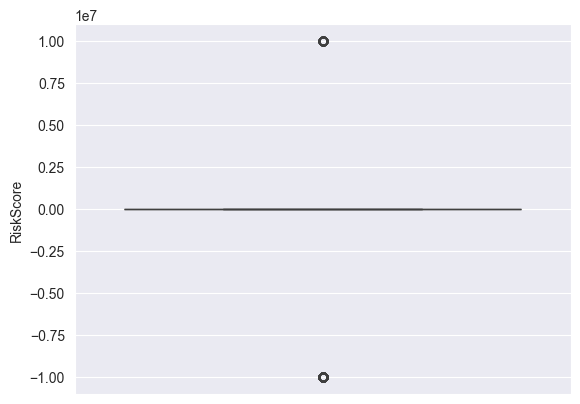

In [84]:
sns.boxplot(data=data['RiskScore'])

как видно из боксплота - в выборке наблюдается 2 аномальных значения - найдем их с помощью IQR

In [85]:
Q1 = np.percentile(data['RiskScore'], 25)
Q3 = np.percentile(data['RiskScore'], 75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['RiskScore'] > upper_bound) | (data['RiskScore'] < lower_bound)]

print("количество выбросов: ", len(outliers))

outliers['RiskScore'].unique()

количество выбросов:  215


array([-9999999., 10000000.])

In [86]:
data = data[(data['RiskScore'] != -9999999.) & (data['RiskScore'] != 10000000.)] #удалим из выборки строки, в которых RiskScore соответствует аномальным значениям
data['RiskScore'].describe()

count    10272.000000
mean        48.358094
std         17.241456
min         14.841417
25%         32.722756
50%         44.195792
75%         65.124190
max         97.597249
Name: RiskScore, dtype: float64

<Axes: ylabel='RiskScore'>

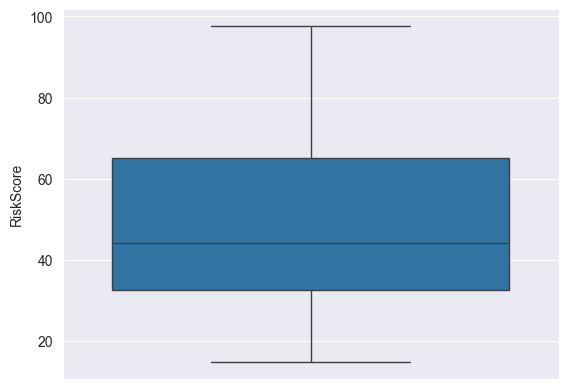

In [87]:
sns.boxplot(data=data['RiskScore'])

In [88]:
#data.drop('ApplicationDate', inplace=True, axis=1)

num_cols = data.select_dtypes(include=["float64", "int64"]).columns.tolist()
categorical_cols = data.select_dtypes(include=["object"]).columns.tolist()

data

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,1980-01-15,39.0,300000.0,850.0,7721.0,72.0,Divorced,5.0,Own,276.0,...,Employed,Associate,16.0,18607.0,0.107721,0.108596,146.407421,0.016896,1.0,28.051757
11012,2010-07-10,57.0,300000.0,850.0,14756.0,48.0,Married,2.0,Own,620.0,...,Employed,Associate,38.0,167544.0,0.094756,0.106387,378.792448,0.039952,1.0,32.440586
11013,2003-10-22,28.0,15000.0,300.0,51361.0,96.0,Single,1.0,Own,696.0,...,Employed,Bachelor,5.0,116879.0,0.446361,0.401087,1793.042130,1.991234,0.0,67.673170
11014,1983-05-12,23.0,15000.0,302.0,30724.0,72.0,Married,3.0,Rent,413.0,...,Self-Employed,Associate,0.0,250778.0,0.404724,0.360670,1047.672294,1.168538,0.0,75.292707


In [89]:
# for cat in categorical_cols[1:]:
#     print(cat, data[cat].nunique())

In [90]:
from sklearn.impute import KNNImputer

In [91]:
imputer = KNNImputer(n_neighbors=5)

In [92]:
data[num_cols[:-1]] = imputer.fit_transform(data[num_cols[:-1]])

data[num_cols[:-1]].isna().sum()

C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3126558488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[num_cols[:-1]] = imputer.fit_transform(data[num_cols[:-1]])


Age                           0
AnnualIncome                  0
CreditScore                   0
LoanAmount                    0
LoanDuration                  0
NumberOfDependents            0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
Experience                    0
NetWorth                      0
BaseInterestRate              0
InterestRate                  0
MonthlyLoanPayment            0
TotalDebtToIncomeRatio        0
LoanApproved                  0
dtype: int64

In [93]:
for feature in categorical_cols:
    most_frequent_value = data[feature].mode()[0]
    data[feature].fillna(most_frequent_value, inplace=True)
data[categorical_cols].isna().sum()

C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\2390647562.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[feature].fillna(most_frequent_value, inplace=True)
C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\2390647562.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature].fillna(most_frequent_value, inplace=True)


ApplicationDate        0
MaritalStatus          0
HomeOwnershipStatus    0
LoanPurpose            0
EmploymentStatus       0
EducationLevel         0
dtype: int64

In [94]:
data

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,1980-01-15,39.0,300000.0,850.0,7721.0,72.0,Divorced,5.0,Own,276.0,...,Employed,Associate,16.0,18607.0,0.107721,0.108596,146.407421,0.016896,1.0,28.051757
11012,2010-07-10,57.0,300000.0,850.0,14756.0,48.0,Married,2.0,Own,620.0,...,Employed,Associate,38.0,167544.0,0.094756,0.106387,378.792448,0.039952,1.0,32.440586
11013,2003-10-22,28.0,15000.0,300.0,51361.0,96.0,Single,1.0,Own,696.0,...,Employed,Bachelor,5.0,116879.0,0.446361,0.401087,1793.042130,1.991234,0.0,67.673170
11014,1983-05-12,23.0,15000.0,302.0,30724.0,72.0,Married,3.0,Rent,413.0,...,Self-Employed,Associate,0.0,250778.0,0.404724,0.360670,1047.672294,1.168538,0.0,75.292707


In [95]:
from sklearn.preprocessing import OneHotEncoder

In [96]:
encoder = OneHotEncoder(sparse_output=False)

In [97]:
data

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,1980-01-15,39.0,300000.0,850.0,7721.0,72.0,Divorced,5.0,Own,276.0,...,Employed,Associate,16.0,18607.0,0.107721,0.108596,146.407421,0.016896,1.0,28.051757
11012,2010-07-10,57.0,300000.0,850.0,14756.0,48.0,Married,2.0,Own,620.0,...,Employed,Associate,38.0,167544.0,0.094756,0.106387,378.792448,0.039952,1.0,32.440586
11013,2003-10-22,28.0,15000.0,300.0,51361.0,96.0,Single,1.0,Own,696.0,...,Employed,Bachelor,5.0,116879.0,0.446361,0.401087,1793.042130,1.991234,0.0,67.673170
11014,1983-05-12,23.0,15000.0,302.0,30724.0,72.0,Married,3.0,Rent,413.0,...,Self-Employed,Associate,0.0,250778.0,0.404724,0.360670,1047.672294,1.168538,0.0,75.292707


In [98]:
one_hot_encoder_data = encoder.fit_transform(data[categorical_cols[1:]])
one_hot_df = pd.DataFrame(one_hot_encoder_data, columns= encoder.get_feature_names_out(categorical_cols[1:]))
one_hot_df

,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Mortgage,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,...,LoanPurpose_Home,LoanPurpose_Other,EmploymentStatus_Employed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10268,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10269,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10270,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3368092103.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


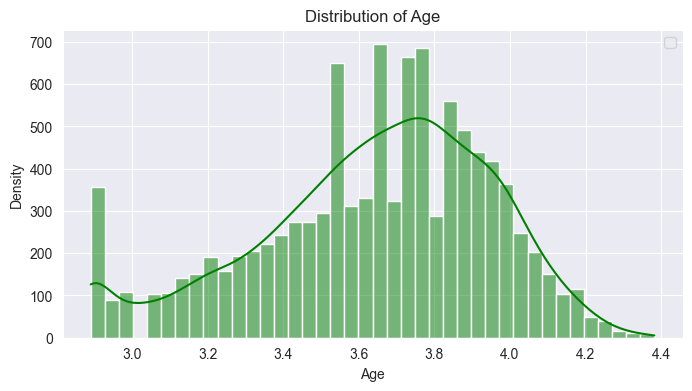

C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3368092103.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


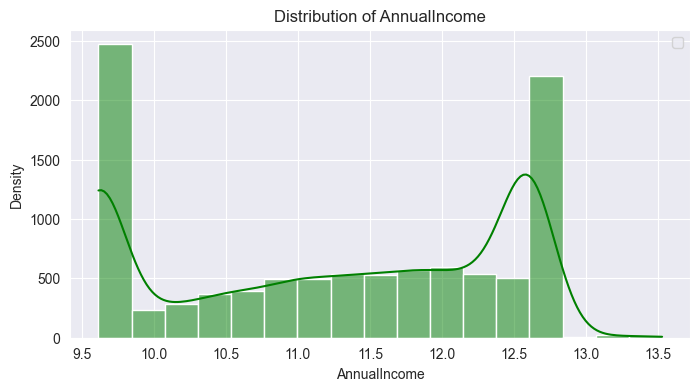

C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3368092103.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


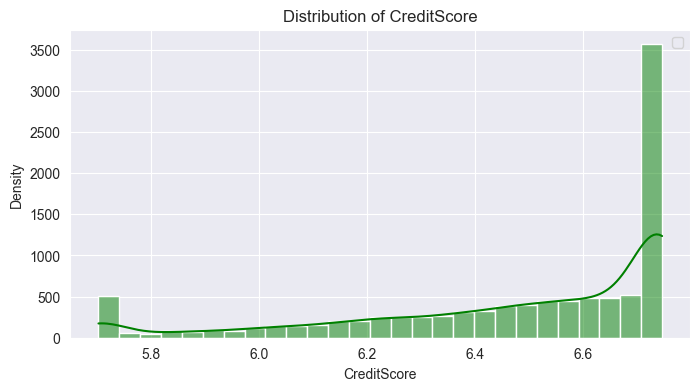

C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3368092103.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


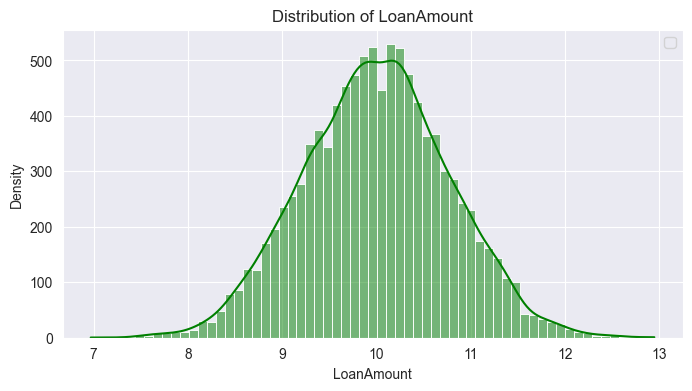

C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3368092103.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


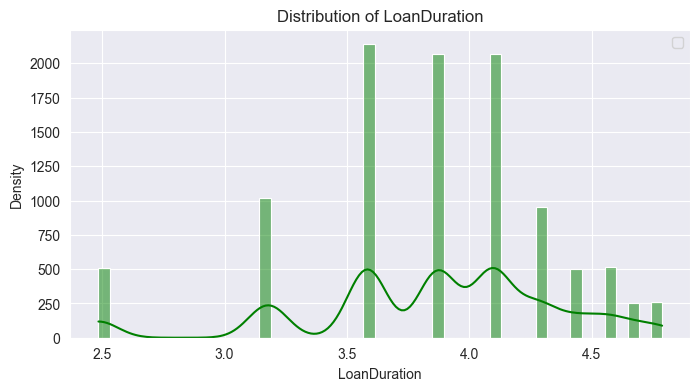

A:\PyToohon\Machine Learning\pythonProject\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3368092103.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


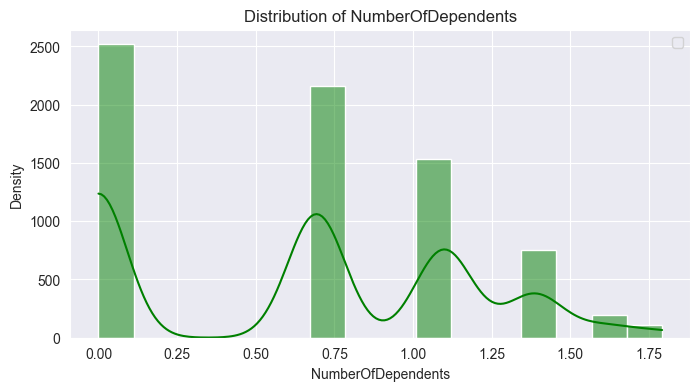

C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3368092103.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


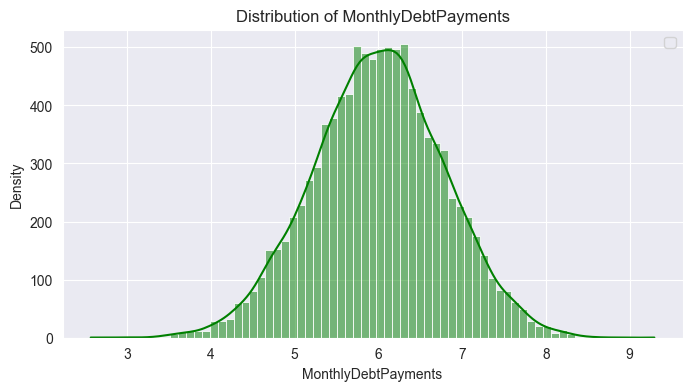

C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3368092103.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


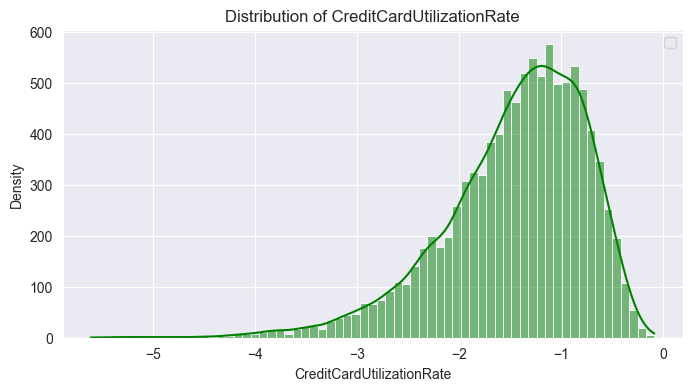

A:\PyToohon\Machine Learning\pythonProject\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3368092103.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


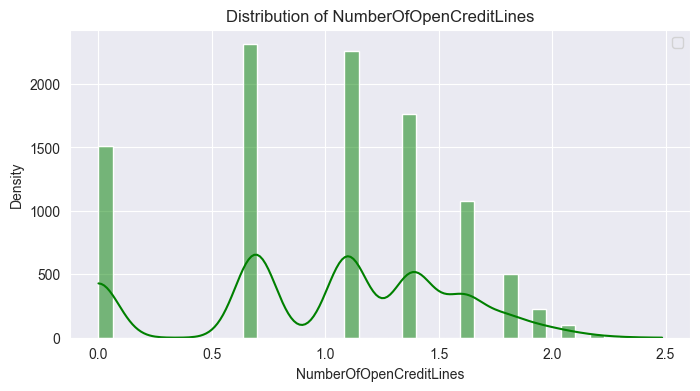

A:\PyToohon\Machine Learning\pythonProject\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3368092103.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


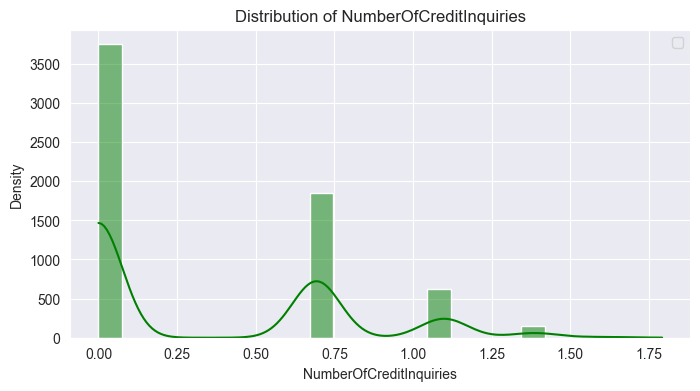

C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3368092103.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


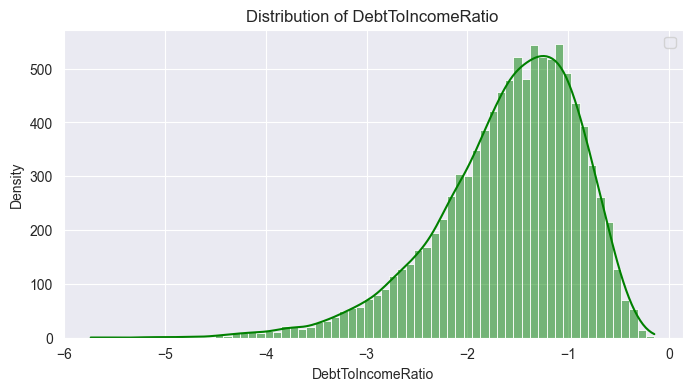

A:\PyToohon\Machine Learning\pythonProject\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3368092103.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


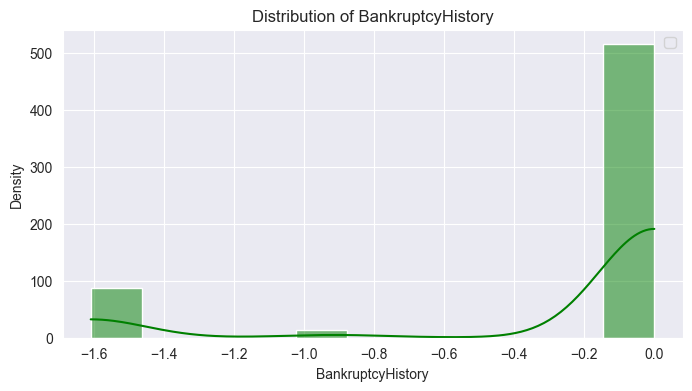

A:\PyToohon\Machine Learning\pythonProject\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3368092103.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


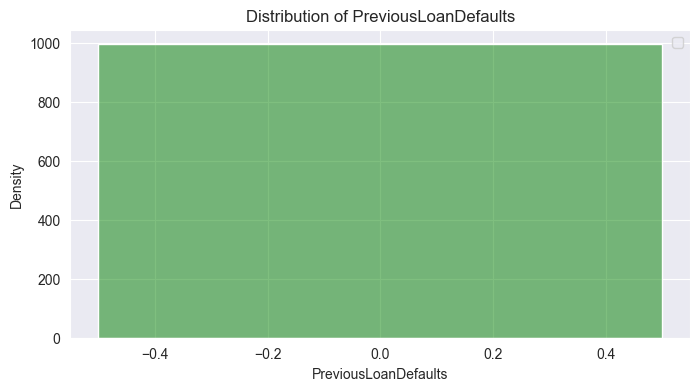

C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3368092103.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


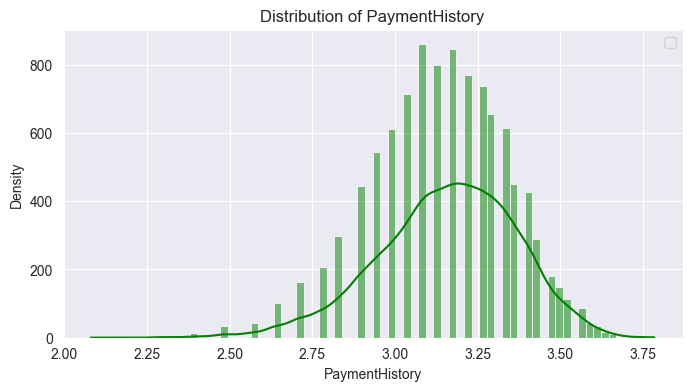

C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3368092103.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


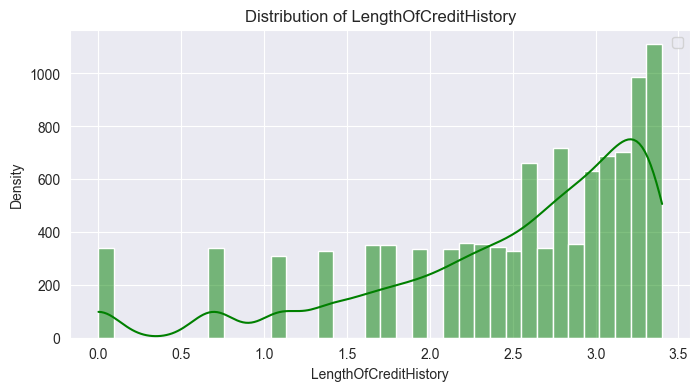

C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3368092103.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


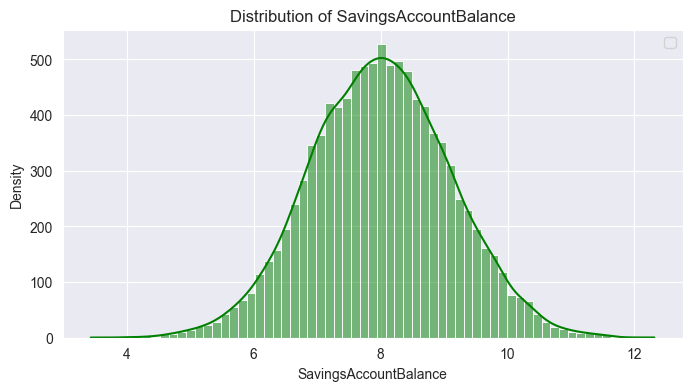

C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3368092103.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


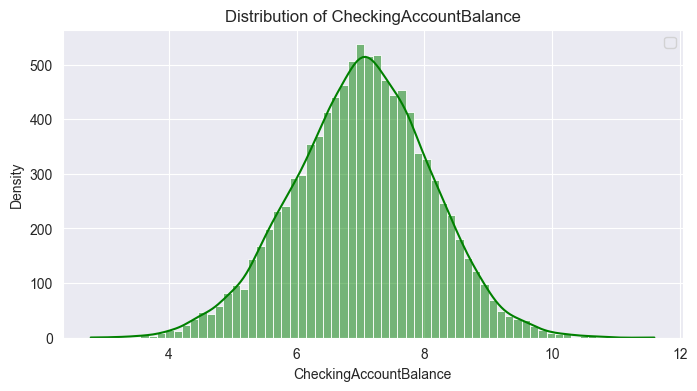

C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3368092103.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


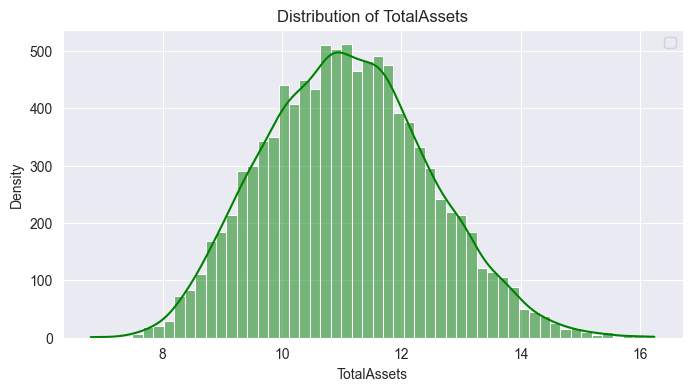

C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3368092103.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


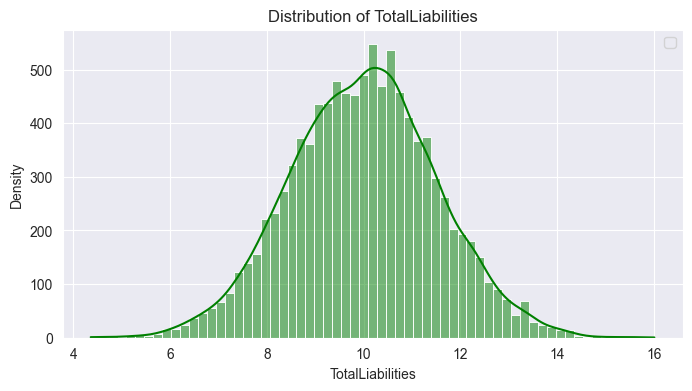

C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3368092103.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


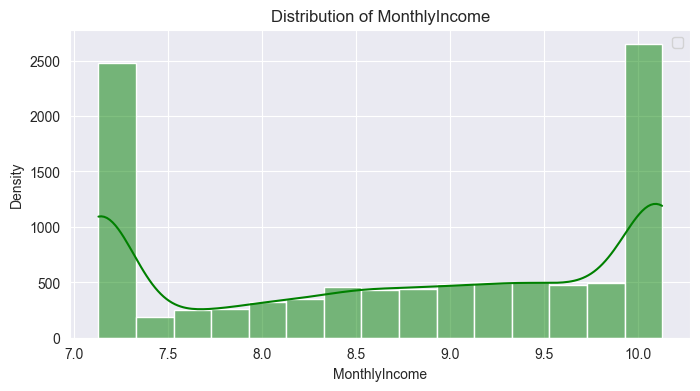

C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3368092103.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


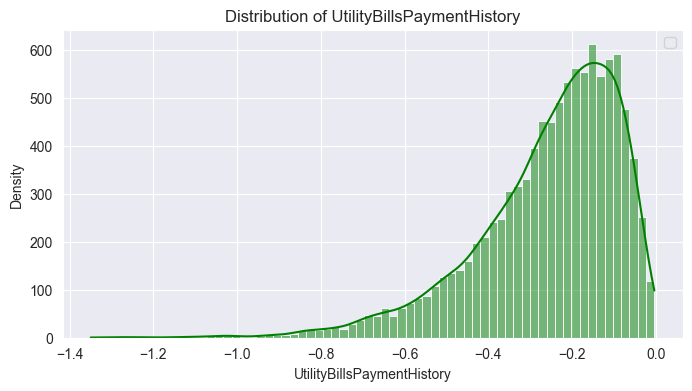

A:\PyToohon\Machine Learning\pythonProject\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3368092103.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


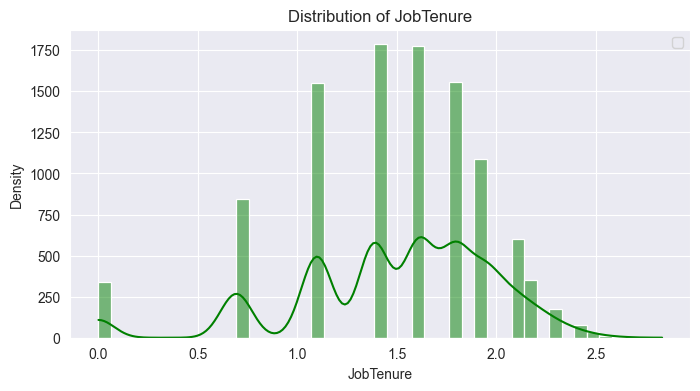

A:\PyToohon\Machine Learning\pythonProject\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3368092103.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


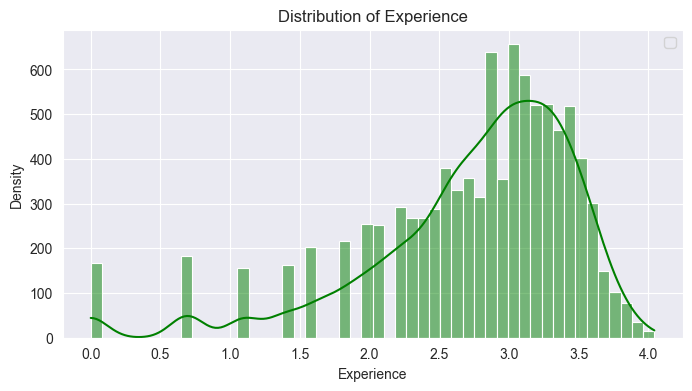

C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3368092103.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


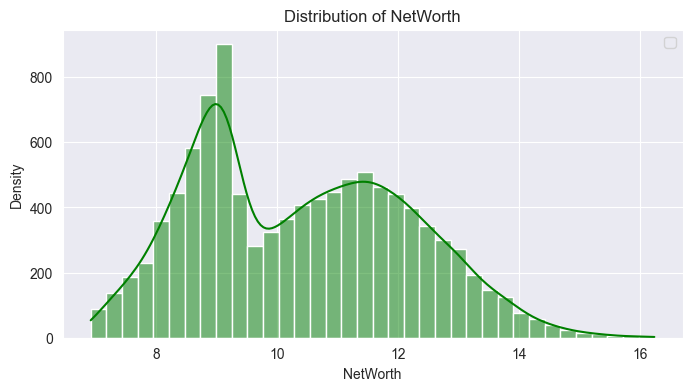

C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3368092103.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


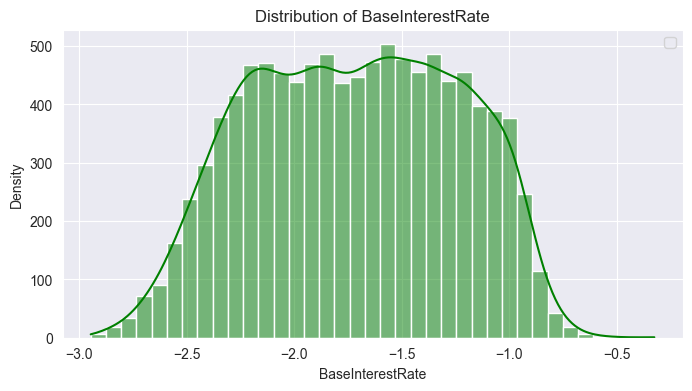

C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3368092103.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


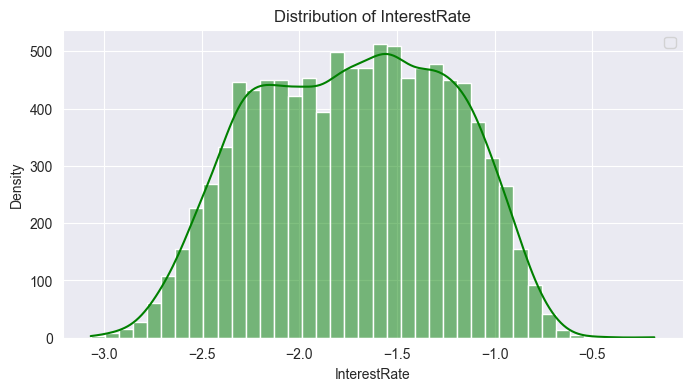

C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3368092103.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


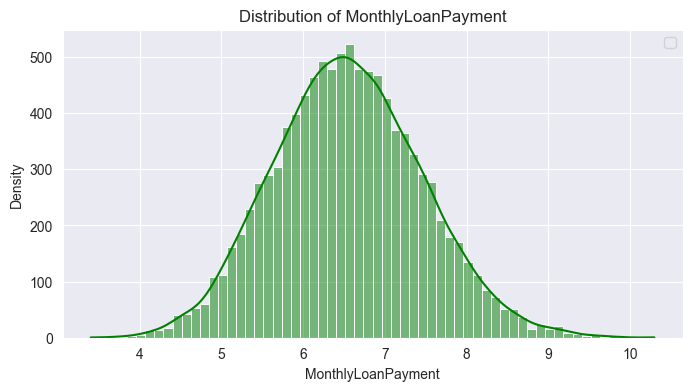

C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3368092103.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


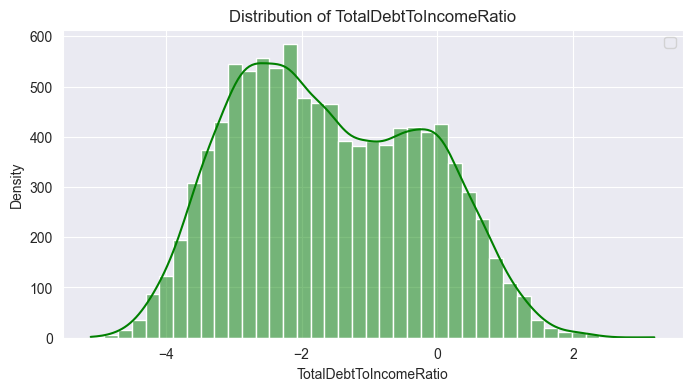

A:\PyToohon\Machine Learning\pythonProject\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3368092103.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


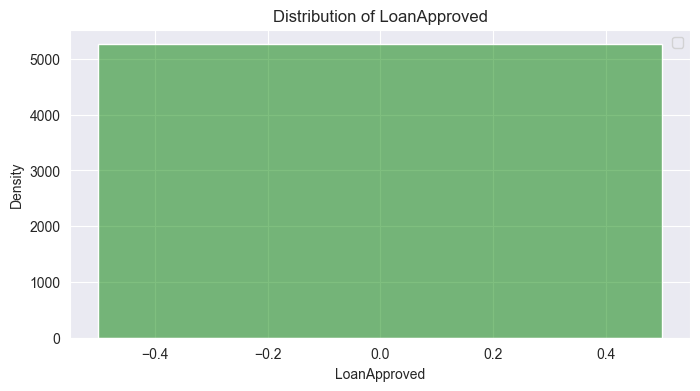

In [99]:
for feature in num_cols[:-1]:
    plt.figure(figsize=(8, 4))  # Создаем новую фигуру
    
    sns.histplot(np.log(data[feature]), kde=True, color='green')
    # sns.histplot(data[feature], kde=True, color='blue')

    plt.title(f'Distribution of {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [100]:
data['Age']
data['AnnualIncome']
data['CreditScore']
data['LoanAmount']
data['MonthlyDebtPayments']
data['CreditCardUtilizationRate']
data['DebtToIncomeRatio']
data['SavingsAccountBalance']
data['CheckingAccountBalance']
data['TotalAssets']
data['TotalLiabilities']
data['BaseInterestRate']
data['InterestRate']
data['NetWorth']
log_columns = ['LoanAmount', 'MonthlyDebtPayments', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyLoanPayment', 'InterestRate', 'BaseInterestRate', 'TotalDebtToIncomeRatio', 'NetWorth', 'UtilityBillsPaymentHistory']
log_columns

['LoanAmount',
 'MonthlyDebtPayments',
 'SavingsAccountBalance',
 'CheckingAccountBalance',
 'TotalAssets',
 'TotalLiabilities',
 'MonthlyLoanPayment',
 'InterestRate',
 'BaseInterestRate',
 'TotalDebtToIncomeRatio',
 'NetWorth',
 'UtilityBillsPaymentHistory']

In [101]:
for col in log_columns:
    data[col] = np.log(data[col])
    

C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\1226878181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = np.log(data[col])


In [102]:
corr_matrix = data[num_cols].corr().abs()
corr_matrix['RiskScore'].sort_values(ascending=False)

RiskScore                     1.000000
LoanApproved                  0.871902
TotalDebtToIncomeRatio        0.793576
CreditScore                   0.783422
MonthlyIncome                 0.770267
AnnualIncome                  0.758514
BaseInterestRate              0.743926
InterestRate                  0.733488
MonthlyLoanPayment            0.201312
BankruptcyHistory             0.172004
NetWorth                      0.167071
TotalAssets                   0.164298
DebtToIncomeRatio             0.110862
LoanAmount                    0.077753
LengthOfCreditHistory         0.061454
CreditCardUtilizationRate     0.056063
PreviousLoanDefaults          0.054959
Experience                    0.046795
Age                           0.044272
LoanDuration                  0.028269
UtilityBillsPaymentHistory    0.026477
MonthlyDebtPayments           0.022690
TotalLiabilities              0.020277
PaymentHistory                0.019917
NumberOfCreditInquiries       0.016380
JobTenure                

In [103]:
# for feature in log_columns:
#     plt.figure(figsize=(8, 4))  # Создаем новую фигуру
    
#     sns.histplot(data[feature], kde=True, color='green')
#     # sns.histplot(data[feature], kde=True, color='blue')

#     plt.title(f'Distribution of {feature}')
#     plt.xlabel(f'{feature}')
#     plt.ylabel('Density')
#     plt.legend()
#     plt.show()

In [104]:
data['MonthlyPaymentRatio'] = data['MonthlyDebtPayments'] / data['MonthlyIncome']
data['MonthlyIncomeToMember'] = data['MonthlyIncome'] / (data['NumberOfDependents'] + 1)
data['InterestRateCombo'] = data['BaseInterestRate'] * data['InterestRate']
data['SavingCheckingBalance'] = data['CheckingAccountBalance'] * data['SavingsAccountBalance']

data['AnnualIncome_squared'] = np.power(data['AnnualIncome'], 0.5)

data['FinancialStable'] = data['TotalAssets'] / data['TotalLiabilities']
data['CreditCardUsage'] = data['LengthOfCreditHistory'] * data['CreditCardUtilizationRate']
data['NumberOfDependents_squared'] = np.pow(data['NumberOfDependents'], 2)
data['AllActivesLoanRatio'] = (data['SavingsAccountBalance'] + data['CheckingAccountBalance'] + data['NetWorth']) / data['LoanAmount']

data['CreditAgeCombo'] = data['CreditCardUtilizationRate'] * data['Age']

data['CreditScoreCube'] = np.pow(data['CreditCardUtilizationRate'], 3)
data['MonthlyLoanCube'] = np.pow(data['MonthlyLoanPayment'], 3)
data['LoanAmountCube'] = np.pow(data['LoanAmount'], 3)
data['NetWorthCube'] = np.pow(data['NetWorth'], 3)
data['TotalLiabilitiesCube'] = np.pow(data['TotalLiabilities'], 3)
data['TotalAssetsCube'] = np.pow(data['TotalAssets'], 3)
data['MonthlyIncomeCube'] = np.pow(data['MonthlyIncome'], 3)
data['LengthOfCreditHistoryCube'] = np.pow(data['LengthOfCreditHistory'], 3)
data['PaymentHistoryCube'] = np.pow(data['PaymentHistory'], 3)
data['MoreThanHalf'] = data['DebtToIncomeRatio'] > 0.5

num_cols[-1] = 'MonthlyPaymentRatio'
num_cols.append('MonthlyIncomeToMember')
num_cols.append('InterestRateCombo')
num_cols.append('SavingCheckingBalance')
num_cols.append('AnnualIncome_squared')
num_cols.append('AllActivesLoanRatio')
num_cols.append('FinancialStable')
num_cols.append('CreditCardUsage')
num_cols.append('NumberOfDependents_squared')

num_cols.append('CreditAgeCombo')
num_cols.append('CreditScoreCube')

num_cols.append('MonthlyLoanCube')
num_cols.append('LoanAmountCube')
num_cols.append('NetWorthCube')
num_cols.append('TotalLiabilitiesCube')
num_cols.append('TotalAssetsCube')
num_cols.append('MonthlyIncomeCube')
num_cols.append('LengthOfCreditHistoryCube')
num_cols.append('PaymentHistoryCube')
num_cols.append('MoreThanHalf')

C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\224602351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MonthlyPaymentRatio'] = data['MonthlyDebtPayments'] / data['MonthlyIncome']
C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\224602351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MonthlyIncomeToMember'] = data['MonthlyIncome'] / (data['NumberOfDependents'] + 1)
C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\224602351.py:3: SettingWithCopyWarning: 
A value is trying to be se

In [105]:
def add_nonlinear_feature_combinations(frame, num_combinations=1, num_cols=None, transformed_features=None):
    """
    Создает нелинейные комбинации признаков и добавляет их в DataFrame.

    :param data: pandas DataFrame с исходными данными
    :param num_combinations: количество комбинаций, которые необходимо создать
    :return: DataFrame с добавленными нелинейными комбинациями признаков
    """
    np.random.seed(42)  # Для повторяемости результатов
    num_features = frame.shape[1]
    
    for i in range(num_combinations):
        # Случайно выбираем функции и их коэффициенты
        chosen_features = np.random.choice(frame.columns, size=3, replace=False)
        coefficients = np.random.rand(3)
        
        print(chosen_features[0], chosen_features[1], chosen_features[2])
        # Создаем нелинейные комбинации
        new_feature = (coefficients[0] * np.power(frame[chosen_features[0]], 2) + 
                       coefficients[1] * np.sin(frame[chosen_features[1]]) + 
                       coefficients[2] * np.power(frame[chosen_features[2]],3))
        
        # Добавляем новую фичу в DataFrame
        data[f'nonlinear_feature_{i+1}'] = new_feature
        num_cols.append(f'nonlinear_feature_{i+1}')
        transformed_features[f'nonlinear_feature_{i+1}'] = [(coefficients[0], chosen_features[0]), (coefficients[1], chosen_features[1]), (coefficients[2], chosen_features[2])]
    
    return data


In [106]:
transformed_features = {}

In [107]:
add_nonlinear_feature_combinations(data[num_cols], num_combinations=20, num_cols=num_cols, transformed_features=transformed_features)

PaymentHistory MonthlyIncomeCube PaymentHistoryCube
MonthlyIncomeToMember CreditCardUsage CreditScore
SavingsAccountBalance PaymentHistoryCube FinancialStable
NetWorthCube LoanAmountCube Experience
BankruptcyHistory MonthlyLoanCube InterestRate
MonthlyLoanPayment CreditAgeCombo BaseInterestRate
InterestRate JobTenure FinancialStable
CreditScore SavingCheckingBalance TotalLiabilitiesCube
NumberOfDependents AllActivesLoanRatio AnnualIncome
TotalAssets JobTenure TotalLiabilitiesCube
PaymentHistoryCube LoanAmountCube Age
CreditCardUsage InterestRateCombo BaseInterestRate
NetWorthCube CheckingAccountBalance AllActivesLoanRatio
LoanAmount LengthOfCreditHistoryCube CreditScoreCube
MonthlyLoanCube TotalLiabilitiesCube CreditAgeCombo
PaymentHistory Age MonthlyIncomeToMember
LengthOfCreditHistoryCube NumberOfDependents_squared LoanApproved
LoanApproved MonthlyIncomeToMember TotalDebtToIncomeRatio
Experience InterestRateCombo JobTenure
CheckingAccountBalance CreditScoreCube LengthOfCreditHistory


C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3664484198.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'nonlinear_feature_{i+1}'] = new_feature
C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3664484198.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'nonlinear_feature_{i+1}'] = new_feature
C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\3664484198.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,nonlinear_feature_11,nonlinear_feature_12,nonlinear_feature_13,nonlinear_feature_14,nonlinear_feature_15,nonlinear_feature_16,nonlinear_feature_17,nonlinear_feature_18,nonlinear_feature_19,nonlinear_feature_20
0,2010-06-26,27.0,66829.0,549.0,9.757884,60.0,Divorced,1.0,Rent,6.998510,...,9.957245e+07,0.833694,140229.311743,65.533301,32564.618290,1.153843e+10,5.032665e+03,-0.809411,30.266167,82.015054
1,1996-09-23,55.0,172147.0,850.0,9.687195,36.0,Widowed,1.0,Mortgage,5.351858,...,2.606791e+08,-0.460330,120484.058585,64.452152,33520.367089,1.972197e+11,5.705834e+05,-23.095909,516.153272,840.488212
2,2015-01-19,51.0,300000.0,850.0,10.556750,36.0,Married,0.0,Mortgage,6.302619,...,5.778430e+07,9.953092,414482.134694,77.154708,82312.264086,8.350367e+12,9.617236e+05,-15.916585,378.724786,1089.668346
3,1981-05-12,25.0,34683.0,847.0,9.861936,48.0,Married,0.0,Other,5.030438,...,2.605598e+08,4.431855,61816.921028,67.059097,31945.461127,1.290303e+10,2.762348e+07,-2.478895,9.025611,5817.807619
4,1995-05-07,55.0,300000.0,850.0,10.323414,48.0,Single,2.0,Rent,6.331502,...,1.236399e+09,0.640314,37834.342500,73.798121,49511.831523,3.092729e+11,1.711662e+05,-20.720801,496.457289,460.370419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,1980-01-15,39.0,300000.0,850.0,8.951699,72.0,Divorced,5.0,Own,5.620401,...,4.000766e+08,-0.855100,96398.398157,55.471584,8957.414187,3.865911e+10,8.443142e+04,-57.645376,123.113882,326.401781
11012,2010-07-10,57.0,300000.0,850.0,9.599405,48.0,Married,2.0,Own,6.429719,...,2.078982e+08,-1.831937,323425.957405,64.270130,38964.994565,3.092729e+11,2.078054e+01,-27.563264,702.936334,10.343504
11013,2003-10-22,28.0,15000.0,300.0,10.846634,96.0,Single,1.0,Own,6.545350,...,1.285377e+08,0.727263,269510.818181,81.908526,98624.177936,1.304745e+08,2.079099e+01,0.453432,21.485608,13.018811
11014,1983-05-12,23.0,15000.0,302.0,10.332799,72.0,Married,3.0,Rent,6.023448,...,2.077612e+08,30.931078,394194.163712,73.620622,63844.771174,1.630933e+07,7.774208e+06,-0.962409,9.747715,3090.364115


In [108]:
all_features = num_cols
multiplications = {}

In [109]:
def add_pseudo_random_multiplicative_features(frame, num_combinations=1, num_cols=None):
    """
    Создает псевдослучайные комбинации признаков путем их перемножения
    и добавляет их в DataFrame.

    :param data: pandas DataFrame с исходными данными
    :param num_combinations: количество комбинаций, которые необходимо создать
    :return: DataFrame с добавленными псевдослучайными произведениями признаков
    """
    np.random.seed(42)  # Для повторяемости результатов
    columns = frame.columns
    
    for i in range(num_combinations):
        # Случайно выбираем две фичи
        chosen_features = np.random.choice(columns, size=2, replace=False)
        
        # Перемножаем выбранные фичи
        new_feature = frame[chosen_features[0]] * frame[chosen_features[1]]
        
        # Добавляем новую фичу в DataFrame
        data[f'multiplicative_feature_{i+1}'] = new_feature
        num_cols.append(f'multiplicative_feature_{i+1}')
        multiplications[f'multiplicative_feature_{i+1}'] = (chosen_features[0], chosen_features[1])
    
    return data

In [110]:
add_pseudo_random_multiplicative_features(data[all_features], num_combinations=10, num_cols=num_cols)

C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\2629981729.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'multiplicative_feature_{i+1}'] = new_feature
C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\2629981729.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'multiplicative_feature_{i+1}'] = new_feature
C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\2629981729.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,multiplicative_feature_1,multiplicative_feature_2,multiplicative_feature_3,multiplicative_feature_4,multiplicative_feature_5,multiplicative_feature_6,multiplicative_feature_7,multiplicative_feature_8,multiplicative_feature_9,multiplicative_feature_10
0,2010-06-26,27.0,66829.0,549.0,9.757884,60.0,Divorced,1.0,Rent,6.998510,...,108.0,104.058327,513.749990,2.151463e+09,94.990738,10.112538,8.924379e+16,-1.826220e+08,2.516332e+04,-16.610563
1,1996-09-23,55.0,172147.0,850.0,9.687195,36.0,Widowed,1.0,Mortgage,5.351858,...,1815.0,126.627482,434.288428,9.036185e+09,2572.313983,5.095893,1.413923e+18,-1.175963e+09,6.276417e+06,-90.105812
2,2015-01-19,51.0,300000.0,850.0,10.556750,36.0,Married,0.0,Mortgage,6.302619,...,1428.0,120.077821,729.401859,1.836857e+09,9219.334724,1.115523,1.387976e+19,-1.315988e+09,1.154068e+07,-58.437791
3,1981-05-12,25.0,34683.0,847.0,9.861936,48.0,Married,0.0,Other,5.030438,...,0.0,78.239507,491.482407,6.514268e+08,36650.255174,18.232481,8.282540e+15,-1.051279e+09,5.800931e+08,-43.524575
4,1995-05-07,55.0,300000.0,850.0,10.323414,48.0,Single,2.0,Rent,6.331502,...,1705.0,133.002530,559.929261,4.198244e+10,1793.982245,3.295628,4.193416e+18,-1.207114e+09,1.540496e+06,-67.607179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,1980-01-15,39.0,300000.0,850.0,8.951699,72.0,Divorced,5.0,Own,5.620401,...,624.0,118.784935,368.396896,7.268536e+09,881.198961,11.942203,6.693591e+18,-1.085015e+09,6.754514e+05,-73.397042
11012,2010-07-10,57.0,300000.0,850.0,9.599405,48.0,Married,2.0,Own,6.429719,...,2166.0,78.498401,490.535411,8.699131e+07,7.643875,7.424623,1.226072e+19,-1.118265e+09,4.156108e+01,-58.833638
11013,2003-10-22,28.0,15000.0,300.0,10.846634,96.0,Single,1.0,Own,6.545350,...,140.0,87.233457,687.494494,2.312008e+08,5.160858,16.832002,1.399028e+15,-1.956191e+07,4.158199e+01,-10.131529
11014,1983-05-12,23.0,15000.0,302.0,10.332799,72.0,Married,3.0,Rent,6.023448,...,0.0,102.008088,567.000440,5.773959e+08,41515.140032,28.988470,1.691976e+15,-2.221484e+07,1.321615e+08,-8.999241


In [111]:
data.columns


Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore',
       'MonthlyPaymentRatio', 'MonthlyIncomeToMember', 'InterestRateCombo',
       'SavingCheckingBalance', 'AnnualIncome_squared', 'FinancialStable',
       'CreditCardUsage', 'NumberOfDependents_squared', 'AllAct

In [112]:
InterestRate = data['InterestRate'] / 12 / 100
tmp = (1 + InterestRate) ** data['LoanDuration']
data['PaymentAmount'] = data['LoanAmount'] * (InterestRate * tmp / (tmp - 1))

num_cols.append('PaymentAmount')

C:\Users\zero7\AppData\Local\Temp\ipykernel_14144\2333774666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PaymentAmount'] = data['LoanAmount'] * (InterestRate * tmp / (tmp - 1))


In [113]:
data

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,multiplicative_feature_2,multiplicative_feature_3,multiplicative_feature_4,multiplicative_feature_5,multiplicative_feature_6,multiplicative_feature_7,multiplicative_feature_8,multiplicative_feature_9,multiplicative_feature_10,PaymentAmount
0,2010-06-26,27.0,66829.0,549.0,9.757884,60.0,Divorced,1.0,Rent,6.998510,...,104.058327,513.749990,2.151463e+09,94.990738,10.112538,8.924379e+16,-1.826220e+08,2.516332e+04,-16.610563,0.156990
1,1996-09-23,55.0,172147.0,850.0,9.687195,36.0,Widowed,1.0,Mortgage,5.351858,...,126.627482,434.288428,9.036185e+09,2572.313983,5.095893,1.413923e+18,-1.175963e+09,6.276417e+06,-90.105812,0.259357
2,2015-01-19,51.0,300000.0,850.0,10.556750,36.0,Married,0.0,Mortgage,6.302619,...,120.077821,729.401859,1.836857e+09,9219.334724,1.115523,1.387976e+19,-1.315988e+09,1.154068e+07,-58.437791,0.283585
3,1981-05-12,25.0,34683.0,847.0,9.861936,48.0,Married,0.0,Other,5.030438,...,78.239507,491.482407,6.514268e+08,36650.255174,18.232481,8.282540e+15,-1.051279e+09,5.800931e+08,-43.524575,0.196435
4,1995-05-07,55.0,300000.0,850.0,10.323414,48.0,Single,2.0,Rent,6.331502,...,133.002530,559.929261,4.198244e+10,1793.982245,3.295628,4.193416e+18,-1.207114e+09,1.540496e+06,-67.607179,0.204618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,1980-01-15,39.0,300000.0,850.0,8.951699,72.0,Divorced,5.0,Own,5.620401,...,118.784935,368.396896,7.268536e+09,881.198961,11.942203,6.693591e+18,-1.085015e+09,6.754514e+05,-73.397042,0.116117
11012,2010-07-10,57.0,300000.0,850.0,9.599405,48.0,Married,2.0,Own,6.429719,...,78.498401,490.535411,8.699131e+07,7.643875,7.424623,1.226072e+19,-1.118265e+09,4.156108e+01,-58.833638,0.190973
11013,2003-10-22,28.0,15000.0,300.0,10.846634,96.0,Single,1.0,Own,6.545350,...,87.233457,687.494494,2.312008e+08,5.160858,16.832002,1.399028e+15,-1.956191e+07,4.158199e+01,-10.131529,0.108864
11014,1983-05-12,23.0,15000.0,302.0,10.332799,72.0,Married,3.0,Rent,6.023448,...,102.008088,567.000440,5.773959e+08,41515.140032,28.988470,1.691976e+15,-2.221484e+07,1.321615e+08,-8.999241,0.139104


In [114]:
from sklearn.preprocessing import StandardScaler

In [115]:
scaler = StandardScaler()

In [116]:
numerical_data = data[num_cols]
numerical_data = scaler.fit_transform(numerical_data)
numerical_data = pd.DataFrame(numerical_data, columns=num_cols)

In [117]:
numerical_data = numerical_data.reset_index(drop=True)
categorical_data = one_hot_df.reset_index(drop=True)

result_data = pd.concat([numerical_data, categorical_data], axis=1)
result_data

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,LoanPurpose_Home,LoanPurpose_Other,EmploymentStatus_Employed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master
0,-1.108451,-0.558650,-0.741546,-0.312090,0.268131,-0.400573,1.273820,-0.831696,-0.591929,0.022255,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.304533,0.350659,0.986774,-0.403305,-0.710632,-0.400573,-0.824384,-0.682975,-0.016743,-0.989281,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.959821,1.454535,0.986774,0.718761,-0.710632,-1.105987,0.387099,1.003963,-0.016743,-0.989281,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.280807,-0.836197,0.969549,-0.177821,-0.221251,-1.105987,-1.233945,-0.602935,2.284003,-0.989281,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.304533,1.454535,0.986774,0.417666,-0.221251,0.304842,0.423902,-0.069843,-0.016743,0.022255,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267,-0.074315,1.454535,0.986774,-1.352384,0.757512,2.421084,-0.482200,-0.435536,-0.591929,0.022255,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10268,1.476889,1.454535,0.986774,-0.516589,-0.221251,0.304842,0.549054,1.211837,-1.167115,2.045329,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10269,-1.022273,-1.006139,-2.171286,1.092826,1.736274,-0.400573,0.696393,0.238311,-0.591929,-0.989281,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10270,-1.453163,-1.006139,-2.159802,0.429777,0.757512,1.010256,0.031372,1.333035,-0.591929,-0.989281,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [118]:
iter = 0
for feature in log_columns:
    squared_feature = f'{feature}_squared'
    result_data[squared_feature] = result_data[feature] ** 2

In [119]:
result_data

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,SavingsAccountBalance_squared,CheckingAccountBalance_squared,TotalAssets_squared,TotalLiabilities_squared,MonthlyLoanPayment_squared,InterestRate_squared,BaseInterestRate_squared,TotalDebtToIncomeRatio_squared,NetWorth_squared,UtilityBillsPaymentHistory_squared
0,-1.108451,-0.558650,-0.741546,-0.312090,0.268131,-0.400573,1.273820,-0.831696,-0.591929,0.022255,...,0.020771,1.975970,0.038560,0.064898,0.122556,0.494208,0.580056,0.061094,0.001710,0.855649
1,1.304533,0.350659,0.986774,-0.403305,-0.710632,-0.400573,-0.824384,-0.682975,-0.016743,-0.989281,...,1.304747,0.198641,0.058314,0.516026,0.114116,1.738422,2.361062,1.008432,0.011131,0.030063
2,0.959821,1.454535,0.986774,0.718761,-0.710632,-1.105987,0.387099,1.003963,-0.016743,-0.989281,...,1.739236,0.255155,1.158419,0.092862,0.428790,0.778128,1.109649,0.554359,1.452793,0.947592
3,-1.280807,-0.836197,0.969549,-0.177821,-0.221251,-1.105987,-1.233945,-0.602935,2.284003,-0.989281,...,0.368092,0.487162,1.357749,1.344564,0.139089,0.862836,1.461237,0.005021,0.502603,0.516863
4,1.304533,1.454535,0.986774,0.417666,-0.221251,0.304842,0.423902,-0.069843,-0.016743,0.022255,...,0.138900,4.066461,0.239483,3.391457,0.007299,1.990733,1.030377,0.949553,1.236408,0.638651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267,-0.074315,1.454535,0.986774,-1.352384,0.757512,2.421084,-0.482200,-0.435536,-0.591929,0.022255,...,1.513235,0.197450,0.000261,0.235337,2.963419,1.013272,1.139053,3.215337,0.099031,0.531929
10268,1.476889,1.454535,0.986774,-0.516589,-0.221251,0.304842,0.549054,1.211837,-1.167115,2.045329,...,0.110111,0.099814,0.459381,5.336975,0.455904,1.099267,1.785004,1.378255,0.846492,0.008565
10269,-1.022273,-1.006139,-2.171286,1.092826,1.736274,-0.400573,0.696393,0.238311,-0.591929,-0.989281,...,0.128075,1.312150,0.181306,2.834711,1.073126,2.734331,3.656598,2.683821,0.515137,0.073673
10270,-1.453163,-1.006139,-2.159802,0.429777,0.757512,1.010256,0.031372,1.333035,-0.591929,-0.989281,...,0.072398,0.094236,0.952837,1.437328,0.197583,2.065901,2.913808,1.574441,1.314803,0.007834


In [120]:
# for feature in num_cols[:-1]:
#     plt.figure(figsize=(8, 4))  # Создаем новую фигуру
    
#     sns.histplot(np.log(result_data[feature]), kde=True, color='green')
#     sns.histplot(result_data[feature], kde=True, color='blue')

#     plt.title(f'Distribution of {feature}')
#     plt.xlabel(f'{feature}')
#     plt.ylabel('Density')
#     plt.legend()
#     plt.show()

In [121]:
# for feature in num_cols[:-1]:
#     result_data[feature] = np.log(result_data[feature])

In [122]:
# result_data.isna().sum()

In [123]:
# data['RiskScore']

In [124]:
correlation = pd.concat([result_data[num_cols], data['RiskScore']], axis=1).corr()
correlation['RiskScore'].sort_values(ascending=False)

RiskScore                   1.000000
nonlinear_feature_9         0.026714
multiplicative_feature_7    0.023291
MonthlyIncomeCube           0.021960
AnnualIncome                0.021954
                              ...   
InterestRate               -0.019658
multiplicative_feature_8   -0.021406
nonlinear_feature_3        -0.023097
SavingsAccountBalance      -0.023898
SavingCheckingBalance      -0.026800
Name: RiskScore, Length: 81, dtype: float64

In [125]:
# corr_matrix = result_data.corr().abs()
# 
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# 
# to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
# 
# result_data.drop(to_drop, axis=1, inplace=True)
# 
# non_cor_features = result_data.columns.to_list()
# result_data

In [126]:
#corr_matrix

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [128]:
#len(non_cor_features)

In [129]:
y = data['RiskScore']
X = result_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

param_grid = {
    'alpha': [0.1, 0.5, 1, 5, 10],  # Коэффициент регуляризации
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1]  # Вес L1-пенализации
}

elastic_net = ElasticNet(fit_intercept=True)


grid_search = GridSearchCV(elastic_net, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error на тестовом наборе:", mse)
print("Mean R2 score", cross_val_score(best_model, X, y, cv=10, scoring="r2").mean())

Лучшие параметры: {'alpha': 0.1, 'l1_ratio': 1}
Mean Squared Error на тестовом наборе: 14.57942271671808
Mean R2 score 0.9492229237814696


In [130]:
y = data['RiskScore']
X = result_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

param_grid = {
    'eps' : [0.001, 0.0001, 0.01, 0.1, 0.05],
    'selection' : ['cyclic', 'random'],
}
lasso = LassoCV(fit_intercept=True)
gr_search = GridSearchCV(lasso, param_grid, cv = 10)

gr_search.fit(X_train, y_train)

best_lasso = gr_search.best_estimator_

print("MSE: ", mean_squared_error(best_lasso.predict(X_test), y_test))
print("Mean R2 score", cross_val_score(best_lasso, X, y, cv=10, scoring="r2").mean())

print("Best params: ", gr_search.best_params_)

A:\PyToohon\Machine Learning\pythonProject\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 195.6415623350913, tolerance: 176.20498664441826
  model = cd_fast.enet_coordinate_descent_gram(
A:\PyToohon\Machine Learning\pythonProject\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186.61439199173765, tolerance: 175.58766448615395
  model = cd_fast.enet_coordinate_descent_gram(
A:\PyToohon\Machine Learning\pythonProject\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194.23299398795643, tolerance: 175.90497744382438
  model = cd_fast.enet_coordinate_descent_gram(
A:\PyToohon\Machi

MSE:  12.878867461941345


A:\PyToohon\Machine Learning\pythonProject\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 424.4267106941843, tolerance: 219.8103391479598
  model = cd_fast.enet_coordinate_descent_gram(
A:\PyToohon\Machine Learning\pythonProject\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1092.6112796702946, tolerance: 219.8103391479598
  model = cd_fast.enet_coordinate_descent_gram(
A:\PyToohon\Machine Learning\pythonProject\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1473.6058865194354, tolerance: 219.8103391479598
  model = cd_fast.enet_coordinate_descent_gram(
A:\PyToohon\Machine 

Mean R2 score 0.954721027565671
Best params:  {'eps': 0.0001, 'selection': 'random'}


A:\PyToohon\Machine Learning\pythonProject\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.160e+04, tolerance: 2.746e+02
  model = cd_fast.enet_coordinate_descent(


<Axes: xlabel='RiskScore', ylabel='Count'>

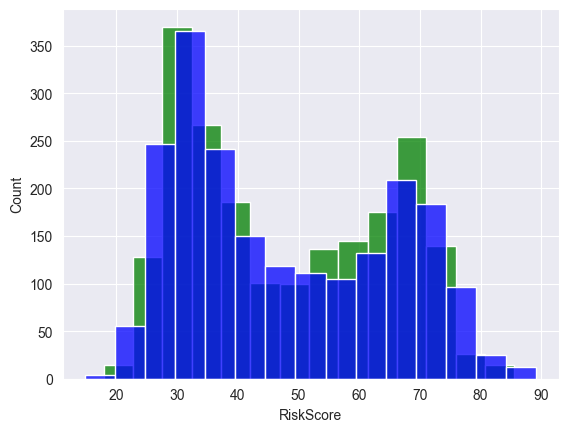

In [131]:
plt.figure()
sns.histplot(y_pred, color='green')
sns.histplot(y_test, color='blue')

In [132]:
best_lasso.coef_

array([ 2.49788497e-01,  6.41715824e+00,  5.87917135e+00, -4.33804602e-02,
       -7.21704582e-01,  8.60053852e-02,  7.77584113e-03,  9.20551837e-01,
        1.20647375e-02, -1.94698080e-02,  2.06447921e+00,  2.64559482e+00,
        6.38308608e-01,  1.30844653e-01, -3.09479489e+00, -0.00000000e+00,
       -0.00000000e+00, -1.25103894e-01,  9.03975714e-04, -1.03507298e+00,
        6.72626714e-02,  6.61485883e-02, -3.22983039e-01, -2.49654422e+00,
       -2.02970860e-03,  3.22834813e+00,  0.00000000e+00,  2.43063452e-01,
       -8.08958658e+00, -5.34145296e-03,  9.42273781e-01, -2.78506067e+00,
       -3.08168509e-02, -1.04960940e+01,  0.00000000e+00, -0.00000000e+00,
        2.87691004e-03, -2.18125670e-02,  2.31139700e-01, -2.06137126e-01,
       -0.00000000e+00, -2.22070655e-01, -1.77392726e+00,  2.88525746e-02,
       -3.41318176e-01,  1.73665413e+00,  1.96508521e+00, -1.78778619e-01,
        1.74327071e-01,  9.62041328e-02, -1.41142806e+01,  3.34883484e-02,
        1.51832496e+00,  

In [133]:
lasso_coef = np.nonzero(best_lasso.coef_)

lasso_features = result_data.columns[lasso_coef]
lasso_features

Index(['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanDuration',
       'NumberOfDependents', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'TotalAssets', 'TotalLiabilities', 'MonthlyIncome',
       'UtilityBillsPaymentHistory', 'JobTenure', 'Experience', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'TotalDebtToIncomeRatio',
       'LoanApproved', 'MonthlyPaymentRatio', 'MonthlyIncomeToMember',
       'InterestRateCombo', 'SavingCheckingBalance', 'AnnualIncome_squared',
       'CreditCardUsage', 'NumberOfDependents_squared', 'CreditAgeCombo',
       'CreditScoreCube', 'LoanAmountCube', 'NetWorthCube',
       'TotalLiabilitiesCube', 'TotalAssetsCube', 'MonthlyIncomeCube',
       'LengthOfCreditHistoryCube', 'PaymentHistoryCube', 'MoreThanHalf',
       'nonlinear_feature_1',

<Axes: xlabel='RiskScore', ylabel='Count'>

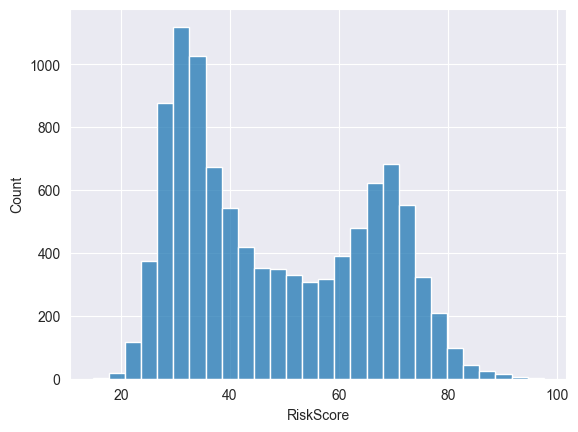

In [134]:
plt.figure()
sns.histplot(data['RiskScore'])


In [135]:
best_model.coef_

array([-0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.01177931, -0.08836587,  0.80969569,  0.        , -0.        ,
        2.04147248,  2.53565909,  0.54970343, -0.        , -0.91160303,
        0.        , -0.        , -0.23963825, -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.53731337, -0.        ,  0.        , -8.35086582,  1.63971579,
        0.        , -0.        , -0.        , -2.75562506,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.17905856, -1.62058298, -0.        , -0.        ,
        0.86978575,  0.        ,  0.        ,  0.12952972,  0.        ,
       -5.77031972,  0.        , -0.        ,  0.        , -0.        ,
       -0.06320804, -0.        ,  0.18351834, -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.87027143,
        0.28371019,  0.        , -0.        ,  0.        , -0.  

<Axes: xlabel='RiskScore', ylabel='Count'>

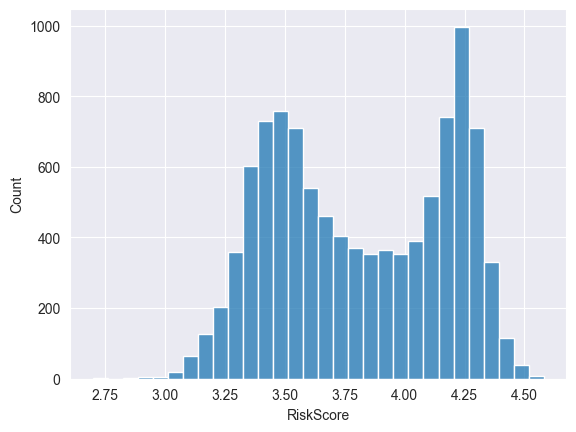

In [136]:
sns.histplot(np.log(data['RiskScore']))

In [137]:
valuable_feature = np.nonzero(best_model.coef_)
result_data.columns[valuable_feature]

Index(['NumberOfDependents', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'LengthOfCreditHistory', 'TotalAssets',
       'InterestRate', 'LoanApproved', 'MonthlyPaymentRatio',
       'AnnualIncome_squared', 'LoanAmountCube', 'NetWorthCube',
       'MonthlyIncomeCube', 'MoreThanHalf', 'nonlinear_feature_2',
       'nonlinear_feature_7', 'nonlinear_feature_9', 'nonlinear_feature_16',
       'nonlinear_feature_17', 'multiplicative_feature_7',
       'multiplicative_feature_9', 'EmploymentStatus_Employed',
       'LoanAmount_squared', 'CheckingAccountBalance_squared',
       'BaseInterestRate_squared', 'NetWorth_squared',
       'UtilityBillsPaymentHistory_squared'],
      dtype='object')

In [138]:
valuable_feature

(array([  5,   6,   7,  10,  11,  12,  14,  17,  25,  28,  29,  33,  41,
         42,  45,  48,  50,  55,  57,  64,  65,  75,  77,  93, 101, 104,
        109, 111, 112]),)

In [139]:
X = result_data[result_data.columns[lasso_coef]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse_cv = np.mean(-cv_scores)
print(f'Mean MSE from cross-validation: {mean_mse_cv}')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on test set: {mse_test}')

Mean MSE from cross-validation: 13.204823202373769
Mean Squared Error on test set: 12.65793789368093


In [140]:
model.score

<bound method RegressorMixin.score of LinearRegression()>

<Axes: xlabel='RiskScore', ylabel='Count'>

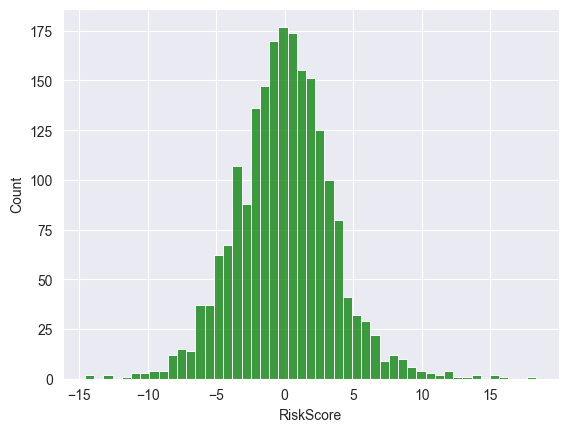

In [141]:
plt.figure()
sns.histplot(y_test - y_pred, color='green')

<Axes: xlabel='RiskScore', ylabel='Count'>

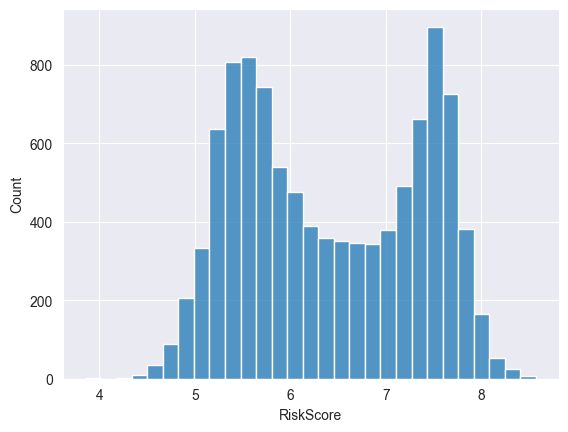

In [142]:
sns.histplot((data['RiskScore'] ** 0.25 - 1) / 0.25)

<Axes: >

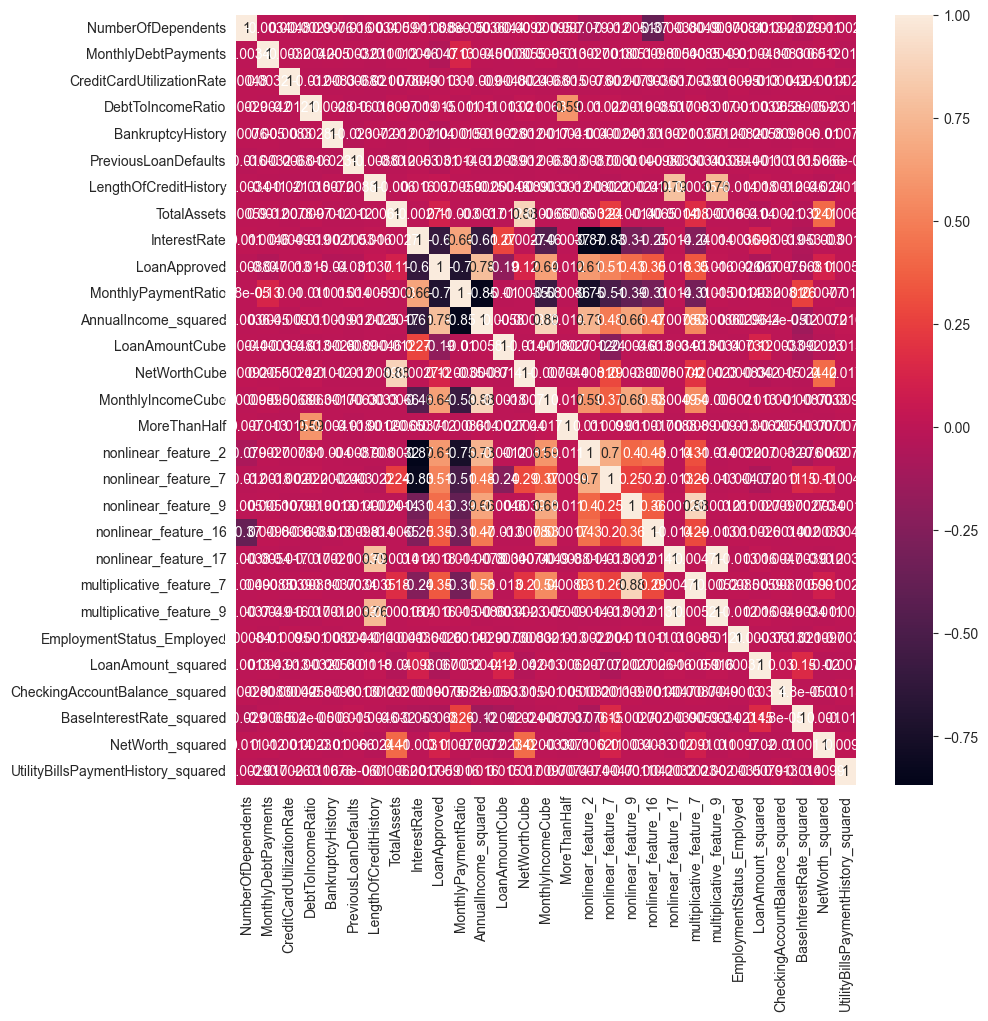

In [143]:
plt.figure(figsize=(10, 10))

corr = result_data[result_data.columns[valuable_feature]].corr()

sns.heatmap(corr, annot=True)

In [144]:
corr

,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,DebtToIncomeRatio,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalAssets,InterestRate,LoanApproved,...,nonlinear_feature_16,nonlinear_feature_17,multiplicative_feature_7,multiplicative_feature_9,EmploymentStatus_Employed,LoanAmount_squared,CheckingAccountBalance_squared,BaseInterestRate_squared,NetWorth_squared,UtilityBillsPaymentHistory_squared
NumberOfDependents,1.000000,-0.003421,0.004828,0.002871,0.007582,-0.016381,-0.003428,0.005923,0.010725,-0.008822,...,-0.374869,-0.003768,-0.004868,-0.003750,0.000840,-0.001324,0.002785,-0.028975,0.011338,-0.002877
MonthlyDebtPayments,-0.003421,1.000000,0.003158,-0.004160,0.004986,-0.003247,-0.010850,0.001241,0.004602,-0.047126,...,0.009821,-0.005374,0.000852,-0.004941,-0.010281,0.004294,-0.008251,-0.006458,0.012158,-0.017176
CreditCardUtilizationRate,0.004828,0.003158,1.000000,-0.012462,-0.008287,-0.006804,-0.020742,-0.007786,0.004854,0.001341,...,-0.003636,-0.016993,-0.003851,-0.015934,0.009450,-0.013460,-0.000419,0.003984,-0.001391,0.002600
DebtToIncomeRatio,0.002871,-0.004160,-0.012462,1.000000,0.002801,-0.016163,-0.018266,0.009652,-0.018667,0.014934,...,-0.008501,-0.017007,0.008333,-0.016592,0.000997,-0.003196,0.005839,0.000062,0.002332,-0.010759
BankruptcyHistory,0.007582,0.004986,-0.008287,0.002801,1.000000,-0.023412,0.007230,-0.012090,-0.002061,-0.040407,...,-0.013109,0.002122,-0.003748,0.001242,-0.008160,-0.005752,-0.009796,0.006010,-0.010398,0.007758
PreviousLoanDefaults,-0.016381,-0.003247,-0.006804,-0.016163,-0.023412,1.000000,-0.008804,-0.011531,0.005336,-0.030758,...,0.000982,-0.003345,-0.003440,-0.003284,0.004412,-0.001058,-0.001252,0.015263,0.006616,0.000007
LengthOfCreditHistory,-0.003428,-0.010850,-0.020742,-0.018266,0.007230,-0.008804,1.000000,-0.006022,0.015594,0.036599,...,-0.013618,0.789749,0.003458,0.755900,-0.013806,0.017645,0.001158,-0.004602,-0.024263,0.010025
TotalAssets,0.005923,0.001241,-0.007786,0.009652,-0.012090,-0.011531,-0.006022,1.000000,-0.002739,0.108561,...,-0.006544,-0.001418,0.175039,-0.000156,-0.000408,-0.040113,0.002143,-0.032044,0.411087,0.006200
InterestRate,0.010725,0.004602,0.004854,-0.018667,-0.002061,0.005336,0.015594,-0.002739,1.000000,-0.599367,...,-0.250744,0.014169,-0.243815,0.014077,0.003599,0.097514,-0.001867,-0.053260,-0.002969,-0.001653
LoanApproved,-0.008822,-0.047126,0.001341,0.014934,-0.040407,-0.030758,0.036599,0.108561,-0.599367,1.000000,...,0.345404,0.018085,0.349929,0.016015,-0.002649,-0.067271,0.000750,-0.067852,0.113125,0.005855


In [145]:
test_data = pd.read_csv('test.csv', index_col="ID")
test_data

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
ID,,,,,,,,,,,,,,,,,,,,,
0,1979-01-03,49,207095,850,14458,60,Single,0,Rent,376,...,6,Employed,High School,23,10626,0.104458,0.125350,325.532336,0.040650,1
1,2006-04-10,28,64653,674,65491,48,Single,2,Own,238,...,3,Employed,High School,3,299024,0.233491,0.260561,2210.247757,0.454410,0
2,2013-11-28,41,300000,768,16811,60,Single,1,Own,469,...,3,Employed,High School,19,6979,0.147811,0.154571,403.977431,0.034919,1
3,1995-08-24,50,300000,850,48737,36,Divorced,0,Mortgage,567,...,3,Self-Employed,Bachelor,26,8438,0.118737,0.099712,1571.946906,0.085558,1
4,1980-06-15,35,300000,672,51916,60,Single,6,Mortgage,106,...,7,Employed,Associate,12,436216,0.230916,0.237727,1486.675235,0.063707,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1993-03-19,40,300000,850,12696,60,Married,1,Other,434,...,3,Self-Employed,Master,19,10957,0.102696,0.094445,266.295150,0.028012,1
4996,2015-09-27,39,75014,572,49380,48,Married,0,Mortgage,97,...,3,Employed,Master,16,7587,0.268380,0.302377,1784.809960,0.301033,0
4997,1993-10-04,43,15000,454,32810,72,Divorced,1,Other,289,...,6,Employed,Bachelor,17,403922,0.330810,0.283165,951.731011,0.992585,0


In [146]:
test_data.isna().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
EmploymentStatus              0
EducationLevel                0
Experience                    0
NetWorth                      0
BaseInterestRate              0
Interest

In [147]:
for col in log_columns:
    test_data[col] = np.log(test_data[col])

In [148]:
test_encoder_data = encoder.fit_transform(test_data[categorical_cols[1:]])
one_hot_df = pd.DataFrame(test_encoder_data, columns= encoder.get_feature_names_out(categorical_cols[1:]))
one_hot_df

,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Mortgage,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,...,LoanPurpose_Home,LoanPurpose_Other,EmploymentStatus_Employed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4996,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4997,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4998,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [149]:
test_data['MonthlyPaymentRatio'] = test_data['MonthlyDebtPayments'] / test_data['MonthlyIncome']
test_data['MonthlyIncomeToMember'] = test_data['MonthlyIncome'] / (test_data['NumberOfDependents'] + 1)
test_data['InterestRateCombo'] = test_data['BaseInterestRate'] * test_data['InterestRate']
test_data['SavingCheckingBalance'] = test_data['CheckingAccountBalance'] * test_data['SavingsAccountBalance']
test_data['AnnualIncome_squared'] = np.power(test_data['AnnualIncome'], 0.5)
test_data['FinancialStable'] = test_data['TotalAssets'] / test_data['TotalLiabilities']
test_data['CreditCardUsage'] = test_data['LengthOfCreditHistory'] * test_data['CreditCardUtilizationRate']
test_data['NumberOfDependents_squared'] = np.pow(test_data['NumberOfDependents'], 2)
test_data['AllActivesLoanRatio'] = (test_data['SavingsAccountBalance'] + test_data['CheckingAccountBalance'] + test_data['NetWorth']) / test_data['LoanAmount']

test_data['CreditAgeCombo'] = test_data['CreditCardUtilizationRate'] * test_data['Age']

test_data['CreditScoreCube'] = np.pow(test_data['CreditCardUtilizationRate'], 3)
test_data['MonthlyLoanCube'] = np.pow(test_data['MonthlyLoanPayment'], 3)
test_data['LoanAmountCube'] = np.pow(test_data['LoanAmount'], 3)
test_data['NetWorthCube'] = np.pow(test_data['NetWorth'], 3)
test_data['TotalLiabilitiesCube'] = np.pow(test_data['TotalLiabilities'], 3)
test_data['TotalAssetsCube'] = np.pow(test_data['TotalAssets'], 3)
test_data['MonthlyIncomeCube'] = np.pow(test_data['MonthlyIncome'], 3)
test_data['LengthOfCreditHistoryCube'] = np.pow(test_data['LengthOfCreditHistory'], 3)
test_data['PaymentHistoryCube'] = np.pow(test_data['PaymentHistory'], 3)
test_data['MoreThanHalf'] = test_data['DebtToIncomeRatio'] > 0.5

InterestRate = test_data['InterestRate'] / 12 / 100
tmp = (1 + InterestRate) ** test_data['LoanDuration']
test_data['PaymentAmount'] = test_data['LoanAmount'] * (InterestRate * tmp / (tmp - 1))

In [150]:
for ind,arr in transformed_features.items():
    test_data[ind] = arr[0][0] * np.pow(test_data[arr[0][1]], 2) + arr[1][0] * np.sin(test_data[arr[1][1]]) + arr[2][0] * np.power(test_data[arr[2][1]], 3)

In [151]:
for ind, pair in multiplications.items():
    test_data[ind] = test_data[pair[0]] * test_data[pair[1]]

In [152]:
numerical_data = test_data[num_cols]
numerical_data = scaler.fit_transform(numerical_data)
num_df = pd.DataFrame(numerical_data, columns=num_cols)


In [153]:
num_df

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,multiplicative_feature_2,multiplicative_feature_3,multiplicative_feature_4,multiplicative_feature_5,multiplicative_feature_6,multiplicative_feature_7,multiplicative_feature_8,multiplicative_feature_9,multiplicative_feature_10,PaymentAmount
0,0.787875,0.638663,0.971893,-0.527762,0.267179,-1.071670,-0.066863,-1.300770,-0.556629,-0.998301,...,-1.051404,-0.111250,-0.221796,-0.576447,1.239270,-0.157161,-1.128043,-0.534261,-0.371477,-0.527253
1,-1.009910,-0.596647,-0.025652,1.356962,-0.222878,0.328657,-0.638839,-1.320560,0.589170,1.001902,...,0.652403,1.328202,-0.402514,-0.060730,0.767834,-0.463493,0.642263,1.811807,0.310338,-0.077867
2,0.103005,1.444370,0.507128,-0.339640,0.267179,-0.371507,0.209562,0.298636,1.162069,-0.998301,...,-1.281378,-0.395359,-0.583839,-0.597905,-1.099781,0.388452,-0.238125,-0.563508,0.338970,-0.507543
3,0.873484,1.444370,0.971893,0.988325,-0.712935,-1.071670,0.446893,1.639138,-0.556629,0.001800,...,0.269974,1.846534,0.480037,-0.580550,-0.333162,0.446126,-1.732265,-0.563508,-0.834098,0.317474
4,-0.410648,1.444370,-0.036987,1.067160,0.267179,3.129310,-1.650457,0.956348,-1.702428,-0.998301,...,-0.321075,0.021715,-0.654868,-0.617878,-0.164657,2.282219,0.594101,-0.564301,0.621299,-0.386033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.017396,1.444370,0.971893,-0.689903,0.267179,-0.371507,0.112558,-1.392589,1.162069,0.001800,...,-0.859709,-0.903637,-0.466003,-0.608805,1.059719,0.529544,-1.321051,-0.558040,-1.363176,-0.546517
4996,-0.068213,-0.506793,-0.603774,1.004678,-0.222878,-1.071670,-1.761431,-1.426408,-0.556629,0.001800,...,-0.644037,1.075319,-0.489366,-0.511454,-0.061400,-0.474771,0.950519,-0.338937,0.612777,-0.108792
4997,0.274222,-1.027257,-1.272583,0.494638,0.757237,-0.371507,-0.396005,0.752251,-0.556629,-0.998301,...,0.492322,0.960310,-0.486613,1.036678,-1.082693,-0.488539,1.154688,0.243345,1.134108,-0.603298
4998,1.130310,-0.303400,0.971893,0.316572,1.737351,-0.371507,-0.777641,-0.921494,-1.129529,0.001800,...,2.162010,-0.449259,5.914282,-0.576185,-0.934312,-0.460022,-0.586898,-0.553300,0.282826,-0.846737


In [154]:
learning_data = pd.concat([num_df,one_hot_df], axis=1)

learning_data

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,LoanPurpose_Home,LoanPurpose_Other,EmploymentStatus_Employed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master
0,0.787875,0.638663,0.971893,-0.527762,0.267179,-1.071670,-0.066863,-1.300770,-0.556629,-0.998301,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.009910,-0.596647,-0.025652,1.356962,-0.222878,0.328657,-0.638839,-1.320560,0.589170,1.001902,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.103005,1.444370,0.507128,-0.339640,0.267179,-0.371507,0.209562,0.298636,1.162069,-0.998301,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.873484,1.444370,0.971893,0.988325,-0.712935,-1.071670,0.446893,1.639138,-0.556629,0.001800,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.410648,1.444370,-0.036987,1.067160,0.267179,3.129310,-1.650457,0.956348,-1.702428,-0.998301,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.017396,1.444370,0.971893,-0.689903,0.267179,-0.371507,0.112558,-1.392589,1.162069,0.001800,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4996,-0.068213,-0.506793,-0.603774,1.004678,-0.222878,-1.071670,-1.761431,-1.426408,-0.556629,0.001800,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4997,0.274222,-1.027257,-1.272583,0.494638,0.757237,-0.371507,-0.396005,0.752251,-0.556629,-0.998301,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4998,1.130310,-0.303400,0.971893,0.316572,1.737351,-0.371507,-0.777641,-0.921494,-1.129529,0.001800,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [155]:
for col in log_columns:
    new_col = f'{col}_squared'
    learning_data[new_col] = learning_data[col] ** 2

In [156]:
y_pred = model.predict(learning_data[result_data.columns[lasso_coef]])
y_pred

array([32.6239306 , 55.79226477, 32.10714915, ..., 61.9818549 ,
       47.38816868, 65.92315402])

In [157]:
data_set = pd.DataFrame(y_pred, index=test_data.index, columns=['RiskScore'])
data_set

,RiskScore
ID,
0,32.623931
1,55.792265
2,32.107149
3,35.558256
4,34.970682
...,...
4995,33.447500
4996,61.040909
4997,61.981855


In [158]:
data_set.to_csv('ex.csv')